In [10]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab
from sklearn.cluster import KMeans

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Menampilkan Gambar dengan Mengubah ke Format RGB

Dimensions of 1.jpg:
Height: 511
Width: 1231
Channels: 3
Reshaped data shape: (629041, 3)

Dimensions of 5.jpg:
Height: 298
Width: 1089
Channels: 3
Reshaped data shape: (324522, 3)

Dimensions of 4.jpg:
Height: 247
Width: 976
Channels: 3
Reshaped data shape: (241072, 3)

Dimensions of 3.jpg:
Height: 217
Width: 1064
Channels: 3
Reshaped data shape: (230888, 3)

Dimensions of 2.jpg:
Height: 120
Width: 264
Channels: 3
Reshaped data shape: (31680, 3)



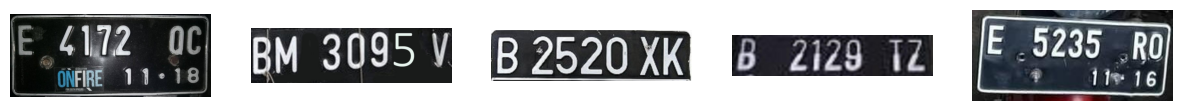

In [4]:
import os
import cv2
import matplotlib.pyplot as plt

folder_path = '/content/drive/MyDrive/Colab Notebooks/ML'

# Dapatkan daftar file citra dalam folder
plat_files = [file for file in os.listdir(folder_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

data = []

# Loop melalui daftar file dan baca setiap gambar
for filename in plat_files:
    # Gabungkan path folder dengan nama file
    file_path = os.path.join(folder_path, filename)

    # Baca gambar
    img = cv2.imread(file_path)

    if img is not None:
        data.append(img)

        h, w, ch = img.shape
        print(f"Dimensions of {filename}:")
        print(f"Height: {h}")
        print(f"Width: {w}")
        print(f"Channels: {ch}")

        img_data = img / 255.0
        img_data = img_data.reshape(h * w, ch)
        print(f"Reshaped data shape: {img_data.shape}\n")

# Fungsi untuk menampilkan gambar
def plot_images(images):
    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
    for i, img in enumerate(images):
        axes[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axes[i].axis('off')
    plt.show()

# Menampilkan gambar
plot_images(data)

Scatter Plot

In [5]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

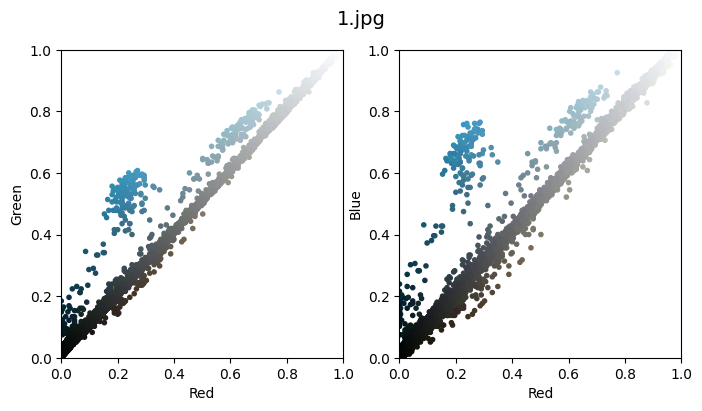

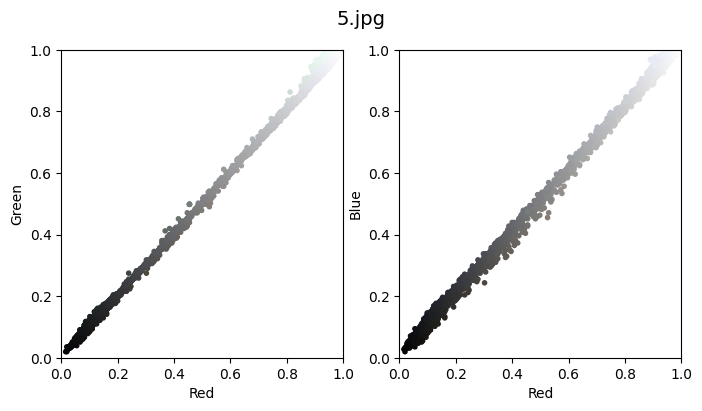

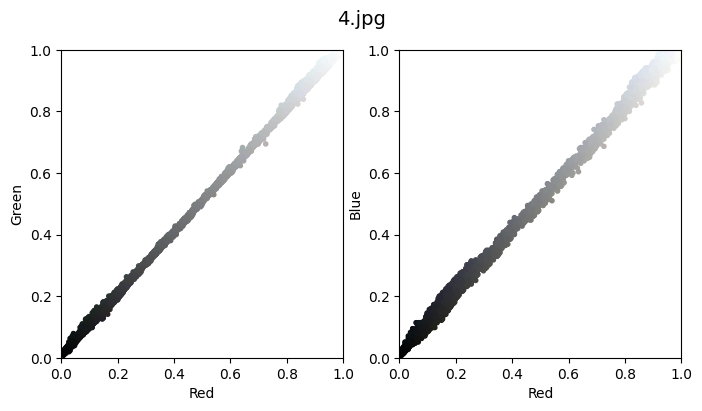

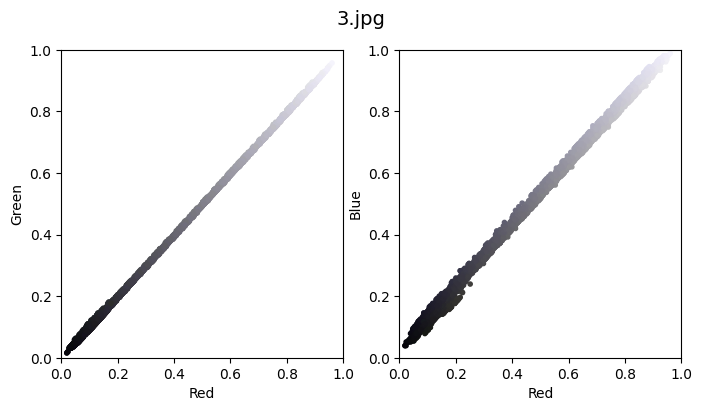

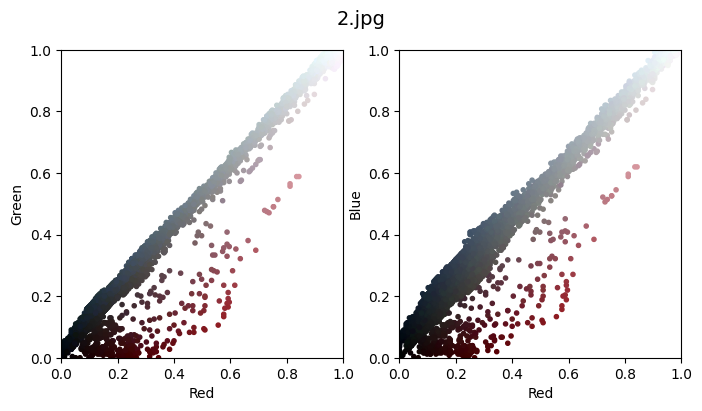

In [6]:
for filename in plat_files:
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        # Gabungkan path folder dengan nama file
        file_path = os.path.join(folder_path, filename)

        # Baca gambar
        img = cv.imread(file_path)

        if img is not None:
            # Ubah ke format RGB
            img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
            h, w, ch = img_rgb.shape
            img_data = img_rgb / 255.0
            img_data = img_data.reshape(h * w, ch)
            plot_pixels(img_data, title=filename)
plt.show()

K-Means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

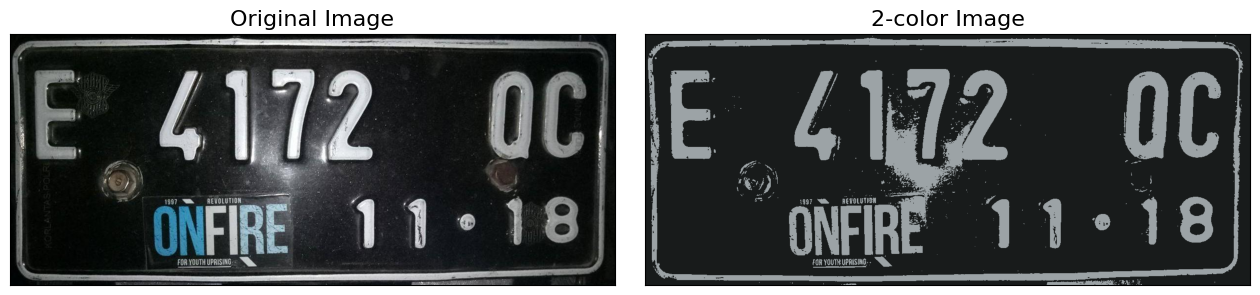

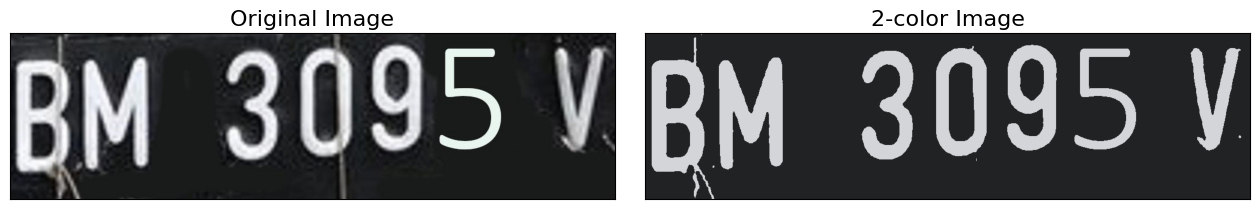

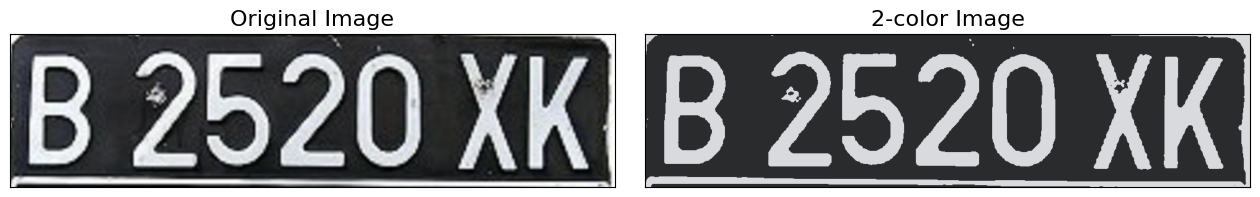

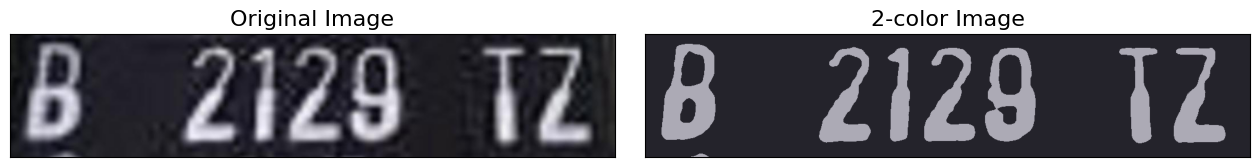

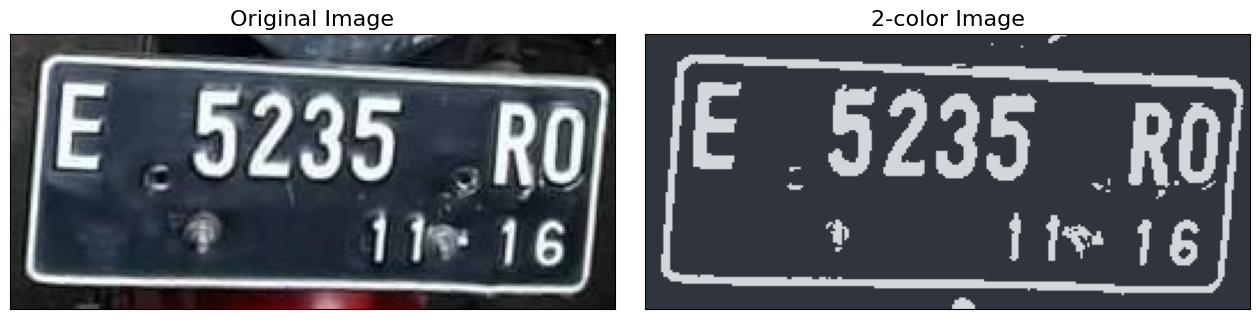

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, mean_squared_error

# Lokasi tempat Anda akan menyimpan hasil segmentasi
output_segmentation_directory = '/content/drive/MyDrive/MachineLearning/Segmentation_Results_KMeans/'

if not os.path.exists(output_segmentation_directory):
    os.makedirs(output_segmentation_directory)

# Terapkan K-Means
for filename in plat_files:
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        # Gabungkan path folder dengan nama file
        file_path = os.path.join(folder_path, filename)

        # Baca gambar
        img = cv.imread(file_path)

        if img is not None:
            # Ubah ke format RGB
            img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

            h, w, ch = img_rgb.shape
            data = img_rgb.reshape(-1, 3)

            kmeans = KMeans(n_clusters=2, random_state=0)
            clusters = kmeans.fit_predict(data)
            center = kmeans.cluster_centers_
            new_colors = center[clusters].reshape(h, w, ch).astype(np.uint8)

            inertia = kmeans.inertia_

            # Ganti warna citra asli dengan citra yang telah diganti warnanya
            img_recolored = new_colors.reshape(img.shape)

            # Simpan hasil segmentasi
            output_path = os.path.join(output_segmentation_directory, filename)
            cv2.imwrite(output_path, new_colors)

            fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
            fig.subplots_adjust(wspace=0.05)
            ax[0].imshow(img_rgb)
            ax[0].set_title('Original Image', size=16)
            ax[1].imshow(new_colors)
            ax[1].set_title('2-color Image', size=16)
plt.show()

### Binary

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


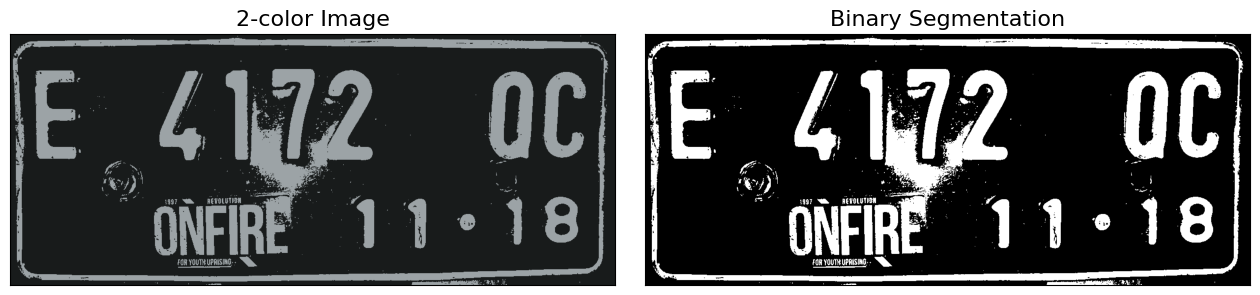

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


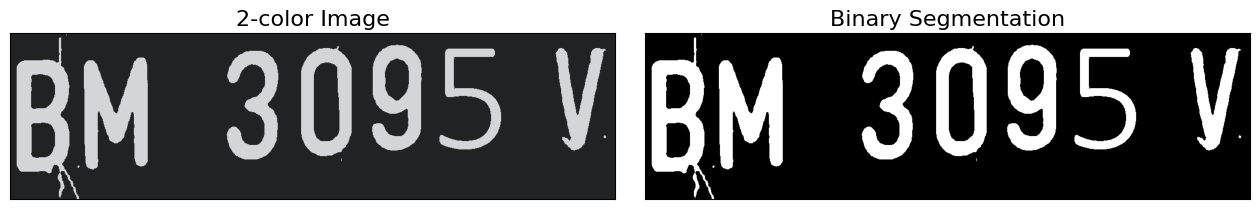

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


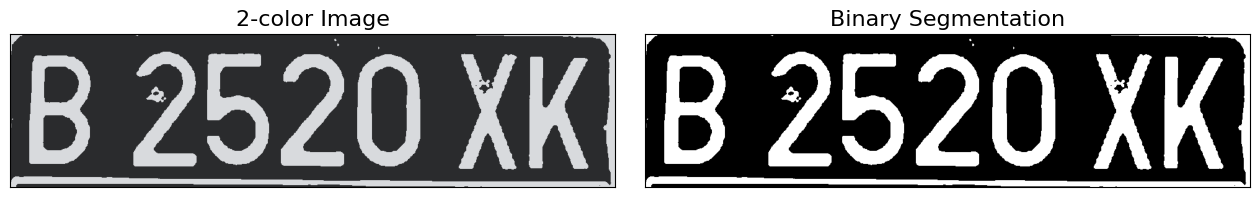

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


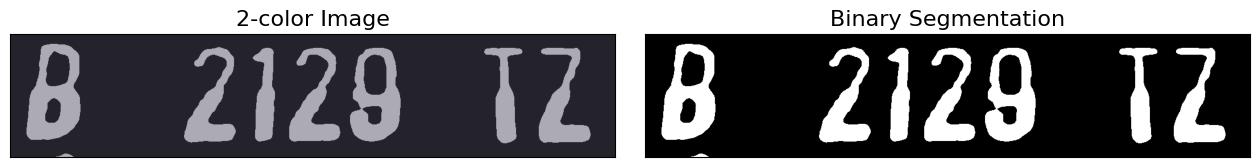

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


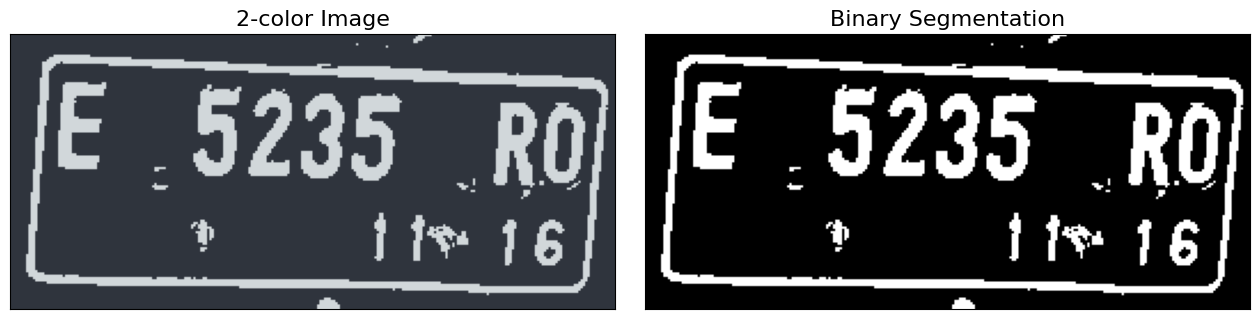

In [11]:

import cv2
import os
import matplotlib.pyplot as plt

folder_path = '/content/drive/MyDrive/Colab Notebooks/ML'

# Dapatkan daftar file citra dalam folder
plat_files = [file for file in os.listdir(folder_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

output_segmentation_directory = '/content/drive/MyDrive/MachineLearning/segmentasi_result/'

# Pastikan folder output_segmentation_directory tersedia
os.makedirs(output_segmentation_directory, exist_ok=True)

# Loop melalui daftar file dan baca setiap gambar
for filename in plat_files:
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        # Gabungkan path folder dengan nama file
        file_path = os.path.join(folder_path, filename)

        # Baca gambar
        img = cv2.imread(file_path)

        if img is not None:
            # Ubah ke format RGB
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            h, w, ch = img_rgb.shape
            data = img_rgb.reshape(-1, 3)

            kmeans = KMeans(n_clusters=2, random_state=0)
            clusters = kmeans.fit_predict(data)
            center = kmeans.cluster_centers_
            new_colors = center[clusters].reshape(h, w, ch).astype(np.uint8)

            inertia = kmeans.inertia_

            # Konversi hasil segmentasi ke citra biner
            gray_img = cv2.cvtColor(new_colors, cv2.COLOR_BGR2GRAY)
            _, binary_img = cv2.threshold(gray_img, 128, 255, cv2.THRESH_BINARY)

            # Simpan hasil segmentasi biner
            output_path = os.path.join(output_segmentation_directory, filename)
            cv2.imwrite(output_path, binary_img)

            # Tampilkan gambar asli, hasil segmentasi berwarna, dan hasil segmentasi biner
            fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
            fig.subplots_adjust(wspace=0.05)
            ax[0].imshow(new_colors)
            ax[0].set_title('2-color Image', size=16)
            ax[1].imshow(binary_img, cmap='gray')
            ax[1].set_title('Binary Segmentation', size=16)
            plt.show()

Evaluasi Hasil Segmentasi

In [9]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-ind tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 19 not upgraded.
Need to get 5,353 kB of archives.
After this operation, 16.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 5,353 kB in 1s (3,630 kB/s)
debconf: unable to ini

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


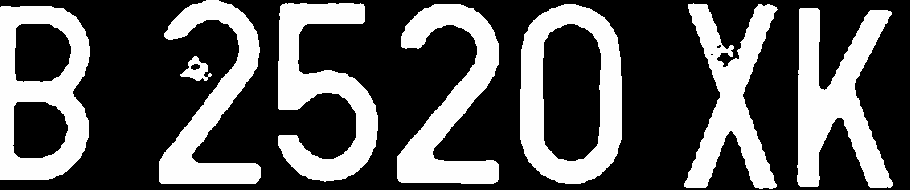

Ground Truth: B 2520 XK
Recognized Text: 
Character Recognition Accuracy: 0.00%


In [60]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
from google.colab.patches import cv2_imshow
import pytesseract

# Load gambar
image_path = '/content/drive/MyDrive/MachineLearning/segmentasi_result/4.jpg'
image = cv2.imread(image_path)

# Ubah gambar ke format RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Lakukan segmentasi menggunakan K-Means
h, w, ch = image_rgb.shape
data = image_rgb.reshape(-1, 3)

kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(data)
center = kmeans.cluster_centers_
new_colors = center[clusters].reshape(h, w, ch).astype(np.uint8)

# Ganti warna citra asli dengan citra yang telah diganti warnanya
segmented_image = new_colors.reshape(image.shape)

# Crop gambar hasil segmentasi
cropped_image = segmented_image[30:220, 40:950]

# Menampilkan gambar hasil cropping
cv2_imshow(cropped_image)

# Menggunakan Pytesseract untuk mendeteksi teks pada gambar hasil cropping
extracted_text = pytesseract.image_to_string(cropped_image)

# Ground truth license plate characters
ground_truth = 'B 2520 XK'  # Ganti dengan ground truth yang sebenarnya

# Menghitung akurasi pengenalan karakter
correct_characters = sum(1 for gt_char, rec_char in zip(ground_truth, extracted_text) if gt_char == rec_char)
total_characters = len(ground_truth)
accuracy = correct_characters / total_characters * 100.0

# Menampilkan hasil ekstraksi teks dan akurasi pengenalan karakter
print(f'Ground Truth: {ground_truth}')
print(f'Recognized Text: {extracted_text}')
print(f'Character Recognition Accuracy: {accuracy:.2f}%')